<font face='Ubuntu' size = 4>
    
# Real Image Simulation

## Denoise the image

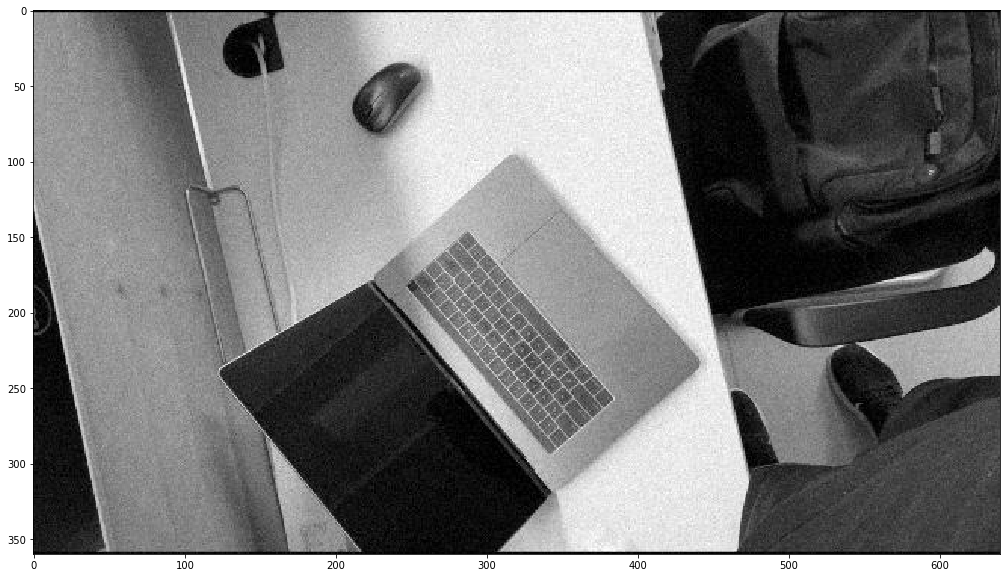

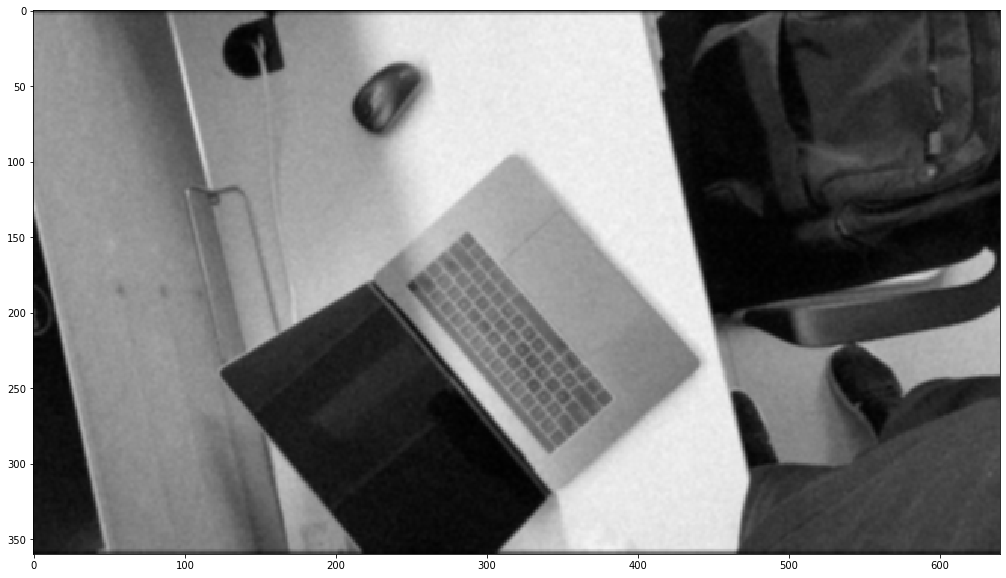

In [11]:
import cv2
import matplotlib.pyplot as plt

img_orig = cv2.imread('figures/71_noise_8.jpg')
plt.figure(figsize= (20, 10))
plt.imshow(img_orig, cmap= 'Greys_r')

img_gaussian = cv2.GaussianBlur(img_orig, (5,5), 0)

plt.figure(figsize= (20, 10))
plt.imshow(img_gaussian, cmap= 'Greys_r')
plt.show()

<font face='Ubuntu' size = 4>   
    
## Simulate the Gradient histogram method

The gradient threshold is 50.000
The gradient threshold is 50.000
The HoG estimation when (2.0) is -2 in 0.0655s
The gradient threshold is 50.000
The gradient threshold is 50.000
The HoG estimation when (4.0) is -4 in 0.0590s
The gradient threshold is 50.000
The gradient threshold is 50.000
The HoG estimation when (6.0) is -6 in 0.0592s
The gradient threshold is 50.000
The gradient threshold is 50.000
The HoG estimation when (8.0) is -8 in 0.0997s
The gradient threshold is 50.000
The gradient threshold is 50.000
The HoG estimation when (10.0) is -10 in 0.0544s


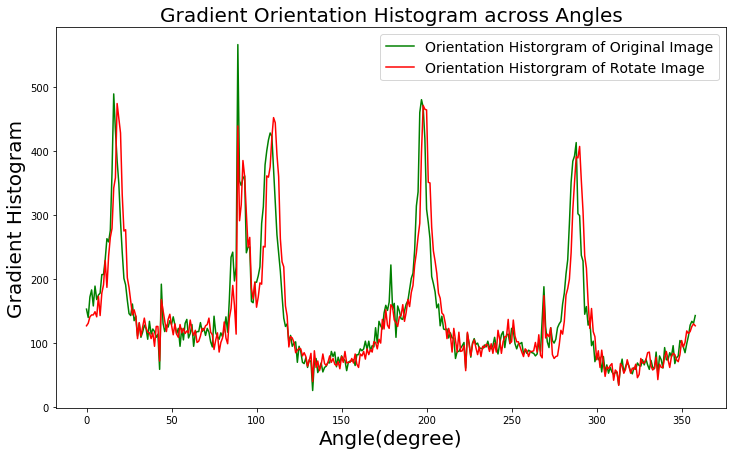

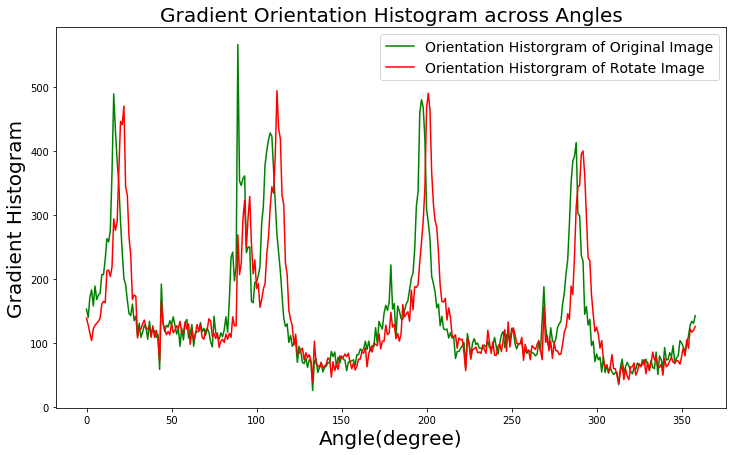

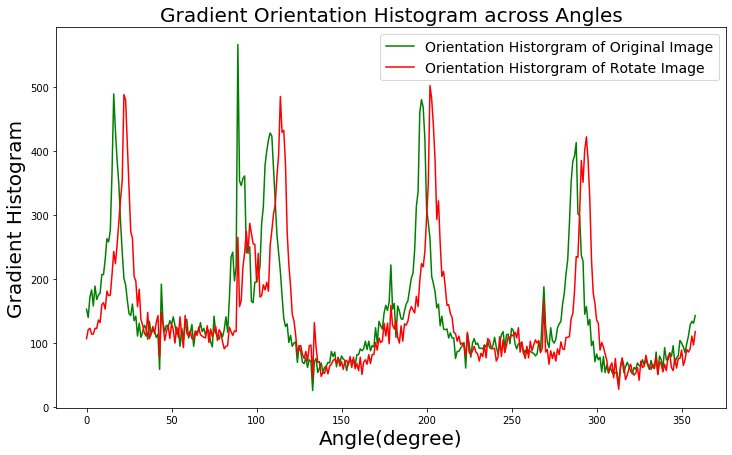

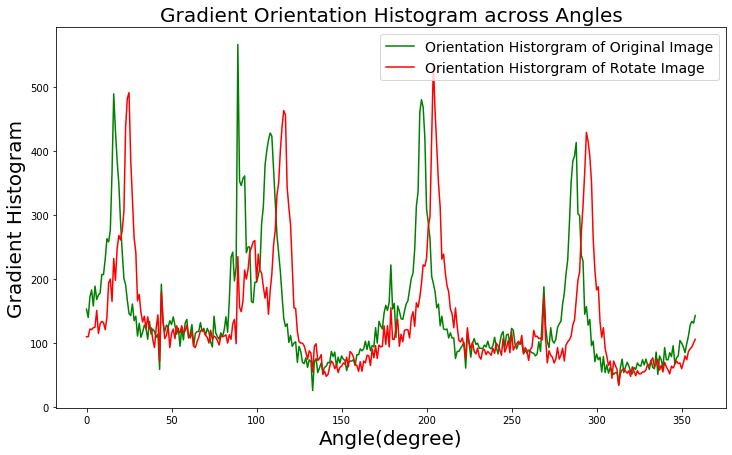

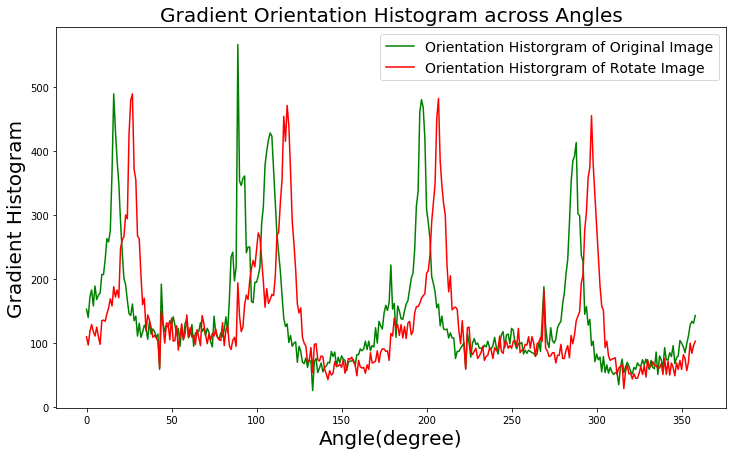

In [14]:
import os
import glob
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

from Utils_orientation import angle_HoG

def HoG_cal(img, mag_thres = 50, bin_num = 360):
    '''
    Calculation the histogram of gradients direction
    '''
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Cal the magnitude and angle of Gradients
    sobelx=cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0)
    sobely=cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1)
    gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
    magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)

    # Set one Threshold which discard the low identity gradient
    #mag_thres = magnitude.max() / 1.5
    print("The gradient threshold is {0:.3f}".format(mag_thres))
    gradient = (magnitude > mag_thres) * gradient
    gradient = (gradient < 0) * 360 + gradient
    hist, bins = np.histogram(gradient, bin_num)
    hist = hist[1:]
    
    return hist

bins = 360
thres = 50
# The translation angles
angle_limits = 15

path = 'figures/real_experiment'
files = []
files = sorted(glob.glob(os.path.join(path, '*.*')))

base_file = files.pop(0)

angles = []

for i, rotate_file in enumerate(files):
    img_base = cv2.imread(base_file, cv2.IMREAD_GRAYSCALE)
    img_rotate = cv2.imread(rotate_file, cv2.IMREAD_GRAYSCALE)
    angle_real = int(rotate_file[-6:-4])
    
    start = time.time()
    
    img_base = cv2.GaussianBlur(img_base, (5,5), 0)
    img_rotate = cv2.GaussianBlur(img_rotate, (5,5), 0)

    hist_base = HoG_cal(img_base, mag_thres= thres, bin_num= bins)
    hist_rotate = HoG_cal(img_rotate, mag_thres= thres, bin_num= bins)
    
    plt.figure(figsize= (12, 7))
    plt.plot(hist_base, 'g', label = 'Orientation Historgram of Original Image')
    plt.plot(hist_rotate, 'r', label = 'Orientation Historgram of Rotate Image')
    plt.legend(fontsize = 14)
    plt.xlabel('Angle(degree)', fontsize = 20)
    plt.ylabel('Gradient Histogram', fontsize = 20)
    plt.title("Gradient Orientation Histogram across Angles", fontsize = 20)

    # Using HoG to calculate the angel
    angle_cal = angle_HoG(hist_base, hist_rotate, limits = angle_limits)
    
    print("The HoG estimation when ({0:.1f}) is {1:2d} in {2:.4f}s" \
        .format(angle_real ,angle_cal, time.time() - start))

plt.show()